In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
titanic=pd.read_csv('/kaggle/input/titanic/train.csv',index_col='PassengerId')
titanic_test=pd.read_csv('/kaggle/input/titanic/test.csv',index_col='PassengerId')

titanic.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


In [3]:
titanic_test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [5]:
titanic.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


In [7]:
titanic_full=pd.concat([titanic,titanic_test],axis=0)

In [8]:
print(titanic.shape)
print(titanic_test.shape)
print(titanic_full.shape)

(891, 11)
(418, 10)
(1309, 11)


In [9]:
titanic_full.isnull().sum()

Survived     418
Pclass         0
Name           0
Sex            0
Age          263
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin       1014
Embarked       2
dtype: int64

In [10]:
# Removing Cabin column becuase out of 891 rows, the "cabin" column has 687 missing values.
titanic_full=titanic_full.drop('Cabin',axis=1)
titanic_full.Embarked.value_counts()
# Filling the two missing values with the most frequent value for Embarked column
titanic_full[['Embarked']]=titanic_full[['Embarked']].fillna('S')

In [11]:
# Creating a list for saving the title of people form the name column
var=titanic_full['Name'].str.split()
list_of_title=[]
for x in range(1,(len(titanic_full)+1)):
    list_of_title.append(var[x][1])

In [12]:
titanic_full['Title']=list_of_title
titanic_full.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
PassengerId,,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr.
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs.
3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss.
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs.
5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr.


In [13]:
titanic_full['Title'].unique()

array(['Mr.', 'Mrs.', 'Miss.', 'Master.', 'Planke,', 'Don.', 'Rev.',
       'Billiard,', 'der', 'Walle,', 'Dr.', 'Pelsmaeker,', 'Mulder,', 'y',
       'Steen,', 'Carlo,', 'Mme.', 'Impe,', 'Ms.', 'Major.', 'Gordon,',
       'Messemaeker,', 'Mlle.', 'Col.', 'Capt.', 'Velde,', 'the',
       'Shawah,', 'Jonkheer.', 'Melkebeke,', 'Cruyssen,', 'Khalil,',
       'Palmquist,', 'Brito,'], dtype=object)

In [14]:
corrections=['Planke,','Billiard,', 'der', 'Walle,',  'Pelsmaeker,', 'Mulder,', 'y',
       'Steen,', 'Carlo,',  'Ms.',  'Gordon,','Messemaeker,',  'Velde,', 'the',
       'Shawah,', 'Jonkheer.', 'Melkebeke,', 'Cruyssen,', 'Khalil,',
       'Palmquist,', 'Brito,']

for x in corrections:
    print(titanic_full.loc[titanic_full['Title']==x,'Name'])

PassengerId
19      Vander Planke, Mrs. Julius (Emelia Maria Vande...
39                     Vander Planke, Miss. Augusta Maria
334                       Vander Planke, Mr. Leo Edmondus
1037                            Vander Planke, Mr. Julius
Name: Name, dtype: object
PassengerId
154         van Billiard, Mr. Austin Blyler
1084      van Billiard, Master. Walter John
1236    van Billiard, Master. James William
Name: Name, dtype: object
PassengerId
171    Van der hoef, Mr. Wyckoff
Name: Name, dtype: object
PassengerId
201    Vande Walle, Mr. Nestor Cyriel
Name: Name, dtype: object
PassengerId
283    de Pelsmaeker, Mr. Alfons
Name: Name, dtype: object
PassengerId
287    de Mulder, Mr. Theodore
Name: Name, dtype: object
PassengerId
308     Penasco y Castellana, Mrs. Victor de Satode (M...
506            Penasco y Castellana, Mr. Victor de Satode
548                            Padro y Manent, Mr. Julian
867                          Duran y More, Miss. Asuncion
965                       Ovi

In [15]:
#Some titles needed some modifications based on their names

a=[19,39,334,1037,154,1084,1236,201,283,287,356,362,907,420,596,800,560,1152,753,760,799,869,874,911,995,1228]
b=[171,308,506,548,867,965,1112,1261,1306]
for x in a:
    titanic_full.loc[x,'Title']=var[x][2]
    
for y in b:
    titanic_full.loc[y,'Title']=var[y][3]
    
    
titanic_full.loc[557,'Title']='Mrs'
titanic_full.loc[600,'Title']='Mr'
titanic_full.loc[760,'Title']='Mrs'

#Some of the titles like Jonkheer,Col,Capt,etc are being left as it is.

In [16]:
titanic_full['Title']=titanic_full['Title'].str.replace('.','').str.replace(',','')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


In [17]:
titanic_full.Title.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Mlle', 'Col', 'Capt', 'Jonkheer', 'Dona'], dtype=object)

In [18]:
#Calculating missing age for title - 'Mr' 
from sklearn.impute import SimpleImputer

mr=pd.DataFrame(titanic_full.loc[titanic_full['Title']=='Mr','Age'])

my_imputer = SimpleImputer(strategy='mean')
imputed_mr=pd.DataFrame(my_imputer.fit_transform(mr[['Age']]))
imputed_mr.index=mr.index
imputed_mr.columns=mr.columns

In [19]:
# Substituting the age for people with title as 'Mr' after finding the average value with the help of simple imputer
titanic_full.loc[titanic_full['Title']=='Mr','Age']=imputed_mr['Age']

In [20]:
# Simple imputer didn't work for title 'Master' so finding the rows and avg age manually.
mt=pd.DataFrame(titanic_full.loc[titanic_full['Title']=='Master','Age'])
master_rows=list((mt[mt['Age'].isnull()]).index)
avg_age_master=titanic_full[titanic_full['Title']=='Master']['Age'].mean()
print(avg_age_master)
for row in master_rows:
    titanic_full.loc[row,'Age']=avg_age_master

5.482641509433963


In [21]:
#Calculating missing age for title - 'Mrs' 
from sklearn.impute import SimpleImputer

mrs=pd.DataFrame(titanic_full.loc[titanic_full['Title']=='Mrs','Age'])

my_imputer = SimpleImputer(strategy='mean')
imputed_mrs=pd.DataFrame(my_imputer.fit_transform(mrs[['Age']]))
imputed_mrs.index=mrs.index
imputed_mrs.columns=mrs.columns

In [22]:
# Substituting the age for people with title as 'Mrs' after finding the average value with the help of simple imputer
titanic_full.loc[titanic_full['Title']=='Mrs','Age']=imputed_mrs['Age']

In [23]:
#Calculating missing age for title - 'Miss' 
from sklearn.impute import SimpleImputer

miss=pd.DataFrame(titanic_full.loc[titanic_full['Title']=='Miss','Age'])

my_imputer = SimpleImputer(strategy='mean')
imputed_miss=pd.DataFrame(my_imputer.fit_transform(miss[['Age']]))
imputed_miss.index=miss.index
imputed_miss.columns=miss.columns

In [24]:
# Substituting the age for people with title as 'Miss' after finding the average value with the help of simple imputer
titanic_full.loc[titanic_full['Title']=='Miss','Age']=imputed_miss['Age']

In [25]:
# Taking the mean of the rows with title 'Dr' because it has only one missing row 
titanic_full[titanic_full['Title']=='Dr']

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
PassengerId,,,,,,,,,,,
246,0.0,1,"Minahan, Dr. William Edward",male,44.0,2,0,19928,90.0000,Q,Dr
318,0.0,2,"Moraweck, Dr. Ernest",male,54.0,0,0,29011,14.0000,S,Dr
399,0.0,2,"Pain, Dr. Alfred",male,23.0,0,0,244278,10.5000,S,Dr
633,1.0,1,"Stahelin-Maeglin, Dr. Max",male,32.0,0,0,13214,30.5000,C,Dr
661,1.0,1,"Frauenthal, Dr. Henry William",male,50.0,2,0,PC 17611,133.6500,S,Dr
767,0.0,1,"Brewe, Dr. Arthur Jackson",male,NaN,0,0,112379,39.6000,C,Dr
797,1.0,1,"Leader, Dr. Alice (Farnham)",female,49.0,0,0,17465,25.9292,S,Dr
1185,NaN,1,"Dodge, Dr. Washington",male,53.0,1,1,33638,81.8583,S,Dr


In [26]:
titanic_full[titanic_full['Title']=='Dr']['Age'].mean()

43.57142857142857

In [27]:
titanic_full.loc[767,'Age']=43.57

In [28]:
# The 'Ms' title has only two rows and one of them is missing, so assigning the value of the first row to the missing one.
titanic_full[titanic_full['Title']=='Ms']

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
PassengerId,,,,,,,,,,,
444,1.0,2,"Reynaldo, Ms. Encarnacion",female,28.0,0,0,230434,13.00,S,Ms
980,NaN,3,"O'Donoghue, Ms. Bridget",female,NaN,0,0,364856,7.75,Q,Ms


In [29]:
titanic_full.loc[980,'Age']=28.0

In [30]:
titanic_full.loc[titanic_full['Fare'].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
PassengerId,,,,,,,,,,,
1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,S,Mr


In [31]:
#Finding the mean of fare for plcass3 as it has only one missing row
p=titanic_full.groupby('Pclass').Fare
p.describe()

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,323.0,87.508992,80.447178,0.0,30.6958,60.0000,107.6625,512.3292
2,277.0,21.179196,13.607122,0.0,13.0000,15.0458,26.0000,73.5000
3,708.0,13.302889,11.494358,0.0,7.7500,8.0500,15.2458,69.5500


In [32]:
titanic_full.loc[1044,'Fare']=13.302889

In [33]:
# No more missing rows
titanic_full.isnull().sum()

Survived    418
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Embarked      0
Title         0
dtype: int64

In [34]:
titanic_full['Age']=round(titanic_full['Age'],1)

In [35]:
titanic_full.tail()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
PassengerId,,,,,,,,,,,
1305,NaN,3,"Spector, Mr. Woolf",male,32.3,0,0,A.5. 3236,8.0500,S,Mr
1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C,Dona
1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S,Mr
1308,NaN,3,"Ware, Mr. Frederick",male,32.3,0,0,359309,8.0500,S,Mr
1309,NaN,3,"Peter, Master. Michael J",male,5.5,1,1,2668,22.3583,C,Master


In [36]:
titanic=titanic_full.loc[1:891]
print(titanic.shape)
titanic_test=titanic_full.loc[892:1309]
print(titanic_test.shape)
titanic_test

(891, 11)
(418, 11)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
PassengerId,,,,,,,,,,,
892,NaN,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,Mr
893,NaN,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,Mrs
894,NaN,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,Mr
895,NaN,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,Mr
896,NaN,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,Mrs
...,...,...,...,...,...,...,...,...,...,...,...
1305,NaN,3,"Spector, Mr. Woolf",male,32.3,0,0,A.5. 3236,8.0500,S,Mr
1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C,Dona
1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S,Mr


In [37]:
titanic['Survived']=titanic['Survived'].astype(int)
titanic_test=titanic_test.drop('Survived',axis=1)
titanic_test.shape

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


(418, 10)

In [38]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr


Text(0.5, 1.0, 'Survival comparision based on gender')

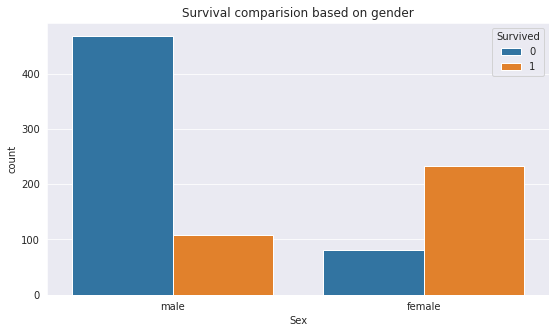

In [39]:
plt.figure(figsize=(9,5))
sns.set_style('darkgrid')
sns.countplot(x=titanic['Sex'],hue=titanic['Survived'])
plt.title('Survival comparision based on gender')

Text(0.5, 1.0, 'Survival comparision based on Pclass')

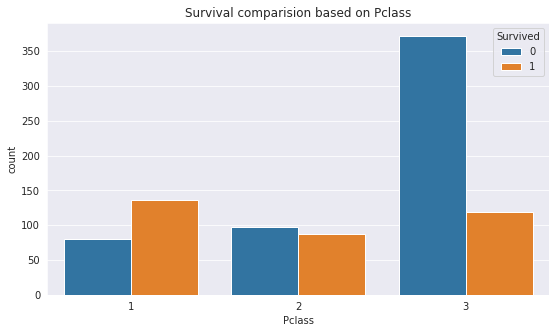

In [40]:
plt.figure(figsize=(9,5))
sns.countplot(x=titanic['Pclass'],hue=titanic['Survived'])
plt.title('Survival comparision based on Pclass')

Text(0.5, 1.0, 'Population based on Pclass')

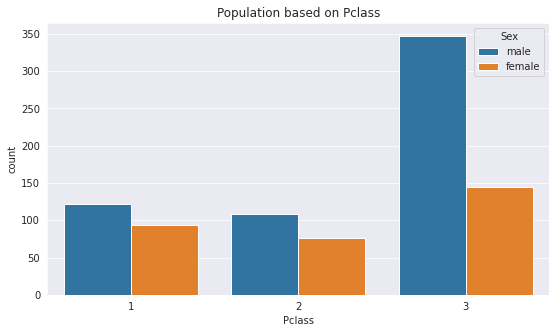

In [41]:
plt.figure(figsize=(9,5))
sns.countplot(x=titanic['Pclass'],hue=titanic['Sex'])
plt.title('Population based on Pclass')

Text(0.5, 1.0, 'Embarked')

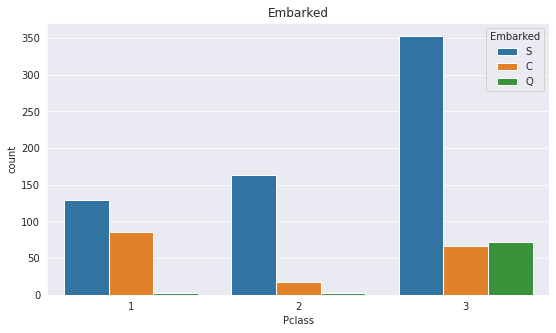

In [42]:
plt.figure(figsize=(9,5))
sns.countplot(x=titanic['Pclass'],hue=titanic['Embarked'])
plt.title('Embarked')

Text(0.5, 1.0, 'Number of male and female embarked')

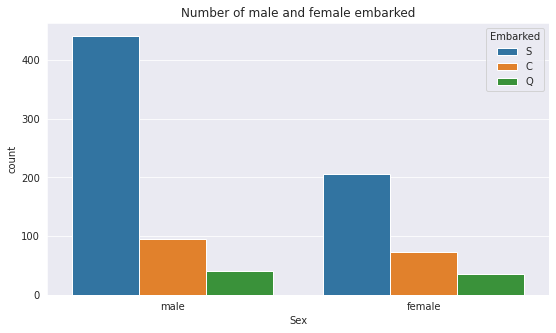

In [43]:
plt.figure(figsize=(9,5))
sns.countplot(x=titanic['Sex'],hue=titanic['Embarked'])
plt.title('Number of male and female embarked')

Text(0.5, 1.0, 'Age vs Gender')

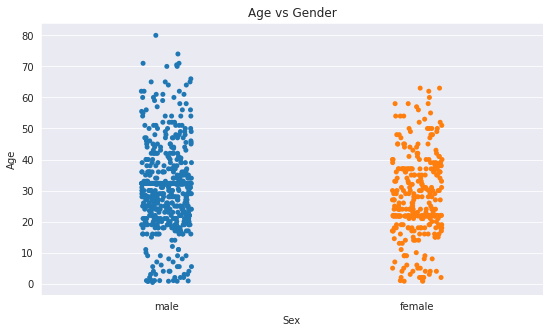

In [44]:
plt.figure(figsize=(9,5))
sns.stripplot(x=titanic['Sex'],y=titanic['Age'])
plt.title('Age vs Gender')

Text(0.5, 1.0, 'Fare vs Pclass')

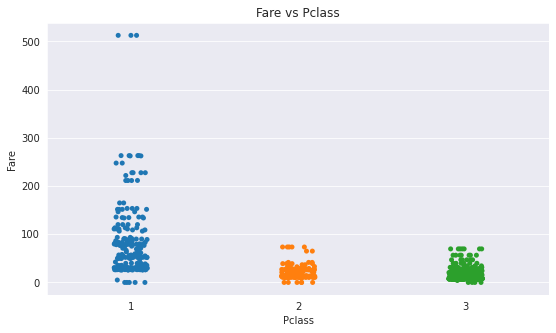

In [45]:
plt.figure(figsize=(9,5))
sns.stripplot(x=titanic['Pclass'],y=titanic['Fare'])
plt.title('Fare vs Pclass')

In [46]:
# Now finding how many survived from a particular class based on gender

Text(0.5, 1.0, 'Survival comparision based on Gender from Class 1')

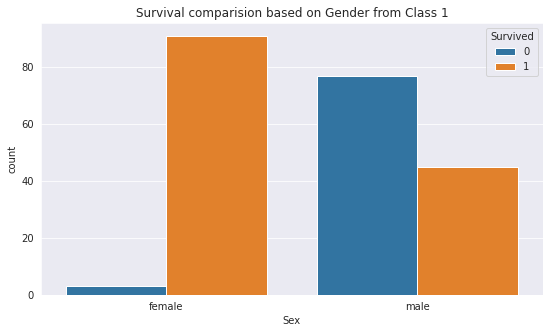

In [47]:
df=titanic[titanic['Pclass']==1]
plt.figure(figsize=(9,5))
sns.countplot(x=df['Sex'],hue=df['Survived'])
plt.title('Survival comparision based on Gender from Class 1')

Text(0.5, 1.0, 'Survival comparision based on Gender from Class 2')

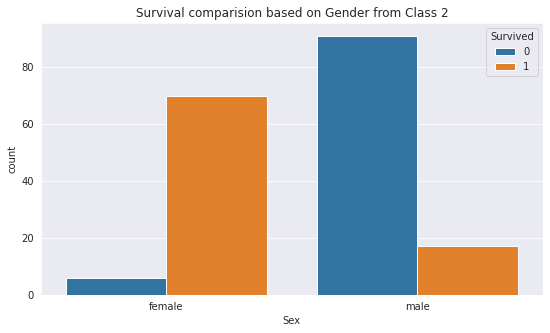

In [48]:
df=titanic[titanic['Pclass']==2]
plt.figure(figsize=(9,5))
sns.countplot(x=df['Sex'],hue=df['Survived'])
plt.title('Survival comparision based on Gender from Class 2')

Text(0.5, 1.0, 'Survival comparision based on Gender from Class 3')

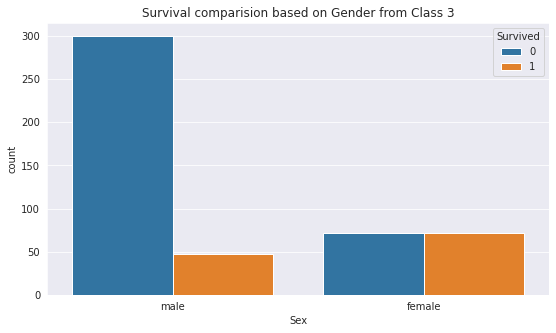

In [49]:
df=titanic[titanic['Pclass']==3]
plt.figure(figsize=(9,5))
sns.countplot(x=df['Sex'],hue=df['Survived'])
plt.title('Survival comparision based on Gender from Class 3')

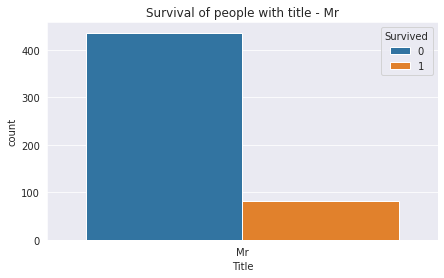

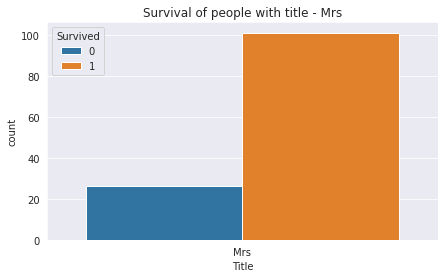

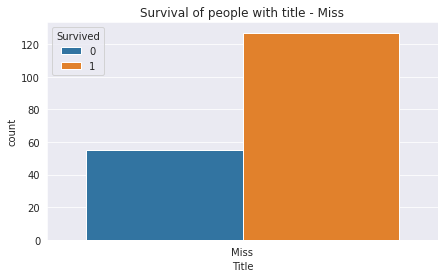

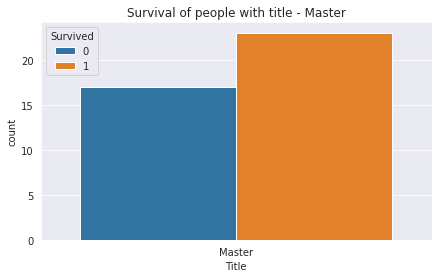

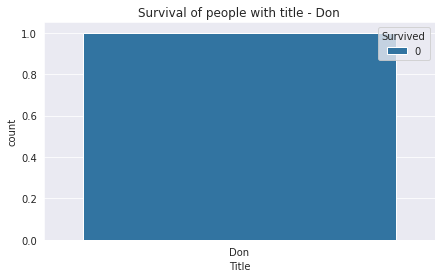

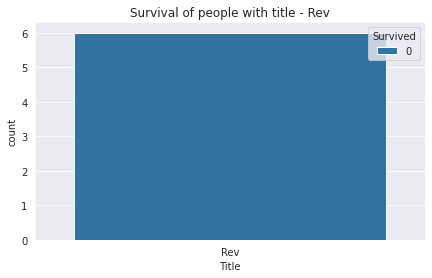

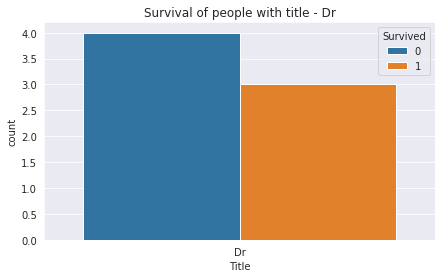

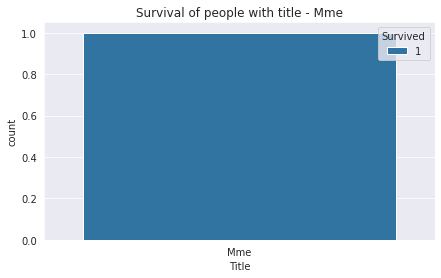

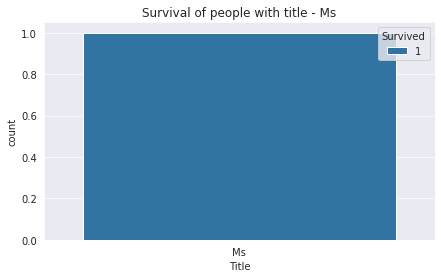

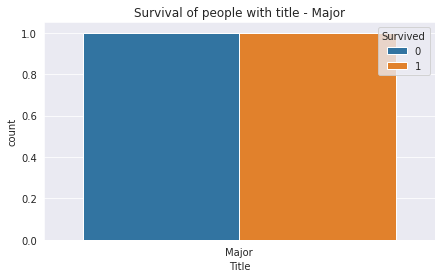

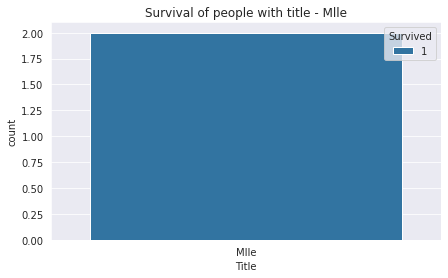

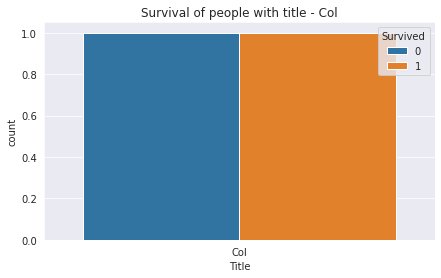

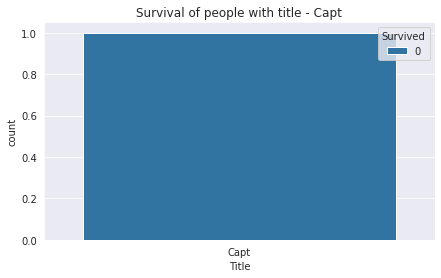

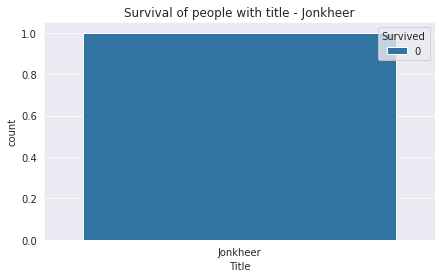

In [50]:
# Survival comparision based on Title
titles=titanic['Title'].unique()
for title in titles:
    plt.figure(figsize=(7,4))
    df=titanic[titanic['Title']==title]

    sns.countplot(x=df['Title'],hue=df['Survived'])
    plt.title('Survival of people with title - {}'.format(title))

In [51]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr


In [52]:
titanic=titanic.drop(['Name','Ticket','Title','Fare'],axis=1)
titanic_test=titanic_test.drop(['Name','Ticket','Title','Fare'],axis=1)
t=titanic['Sex'].map({'male':0,'female':1})
titanic['Sex']=t


In [53]:
test=titanic_test['Sex'].map({'male':0,'female':1})
titanic_test['Sex']=test

In [54]:
embarked_dummies=pd.get_dummies(titanic.Embarked,prefix='Embarked')
embarked_dummies_test=pd.get_dummies(titanic_test.Embarked,prefix='Embarked')

titanic=pd.concat([titanic,embarked_dummies],axis=1)
titanic_test=pd.concat([titanic_test,embarked_dummies_test],axis=1)

titanic=titanic.drop('Embarked',axis=1)
titanic_test=titanic_test.drop('Embarked',axis=1)

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(titanic.loc[:,titanic.columns!='Survived'],titanic['Survived'], 
                test_size = 0.18, random_state = 78)

# Models

In [56]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix,mean_absolute_error
lr=LogisticRegression(penalty='l2',max_iter=1000)
lr.fit(X_train,y_train)
predictions=lr.predict(X_test)
acc=accuracy_score(y_test,predictions)
print(acc)
mae=mean_absolute_error(y_test,predictions)
print(mae)
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

0.8260869565217391
0.17391304347826086
              precision    recall  f1-score   support

           0       0.93      0.81      0.86       108
           1       0.69      0.87      0.77        53

    accuracy                           0.83       161
   macro avg       0.81      0.84      0.81       161
weighted avg       0.85      0.83      0.83       161

[[87 21]
 [ 7 46]]


In [57]:
#SVC
from sklearn.svm import SVC
svc=SVC(C= 100, gamma= 0.01,kernel= 'rbf')
svc.fit(X_train,y_train)
predictions=svc.predict(X_test)
acc=accuracy_score(y_test,predictions)
print(acc)
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

0.8633540372670807
              precision    recall  f1-score   support

           0       0.91      0.89      0.90       108
           1       0.78      0.81      0.80        53

    accuracy                           0.86       161
   macro avg       0.84      0.85      0.85       161
weighted avg       0.86      0.86      0.86       161

[[96 12]
 [10 43]]


In [58]:
#Using GridSearch for svc 
from sklearn.model_selection import GridSearchCV
  

param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = False)

grid.fit(X_train, y_train)

print(grid.best_params_)
print(grid.best_estimator_)

{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
SVC(C=100, gamma=0.01)


In [59]:
svc=SVC(C= 100, gamma= 0.01,kernel= 'rbf')
svc.fit(X_train,y_train)
predictions=svc.predict(X_test)
acc=accuracy_score(y_test,predictions)
print(acc)
mae=mean_absolute_error(y_test,predictions)
print(mae)
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

0.8633540372670807
0.13664596273291926
              precision    recall  f1-score   support

           0       0.91      0.89      0.90       108
           1       0.78      0.81      0.80        53

    accuracy                           0.86       161
   macro avg       0.84      0.85      0.85       161
weighted avg       0.86      0.86      0.86       161

[[96 12]
 [10 43]]


In [60]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(random_state=0,max_features='log2',criterion='gini',
                                 n_estimators=100)
rfc.fit(X_train,y_train)
predictions=rfc.predict(X_test)
acc=accuracy_score(y_test,predictions)
print(acc)
mae=mean_absolute_error(y_test,predictions)
print(mae)
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

0.8198757763975155
0.18012422360248448
              precision    recall  f1-score   support

           0       0.89      0.83      0.86       108
           1       0.70      0.79      0.74        53

    accuracy                           0.82       161
   macro avg       0.80      0.81      0.80       161
weighted avg       0.83      0.82      0.82       161

[[90 18]
 [11 42]]


In [61]:
#Using GridSearch for RFC 
param_grid = {
    'criterion' : ['gini', 'entropy'],
     'n_estimators': [90,100,110],
    'max_features' : ['auto', 'sqrt', 'log2'],
             } 
  
grid = GridSearchCV(RandomForestClassifier(), param_grid, refit = True, verbose = False)

grid.fit(X_train, y_train)

print(grid.best_params_)
print(grid.best_estimator_)

{'criterion': 'gini', 'max_features': 'log2', 'n_estimators': 110}
RandomForestClassifier(max_features='log2', n_estimators=110)


In [62]:
rfc=RandomForestClassifier(random_state=0,max_features='log2',criterion='gini',
                                 n_estimators=100)
rfc.fit(X_train,y_train)
predictions=rfc.predict(X_test)
acc=accuracy_score(y_test,predictions)
print(acc)
mae=mean_absolute_error(y_test,predictions)
print(mae)

0.8198757763975155
0.18012422360248448


In [63]:
# XGB Classifier
from xgboost import XGBClassifier
xgbc=XGBClassifier(n_estimators=90,learning_rate=0.1,random_state=0,gamma=0.1,
                   eval_metric='logloss',use_label_encoder=False)
xgbc.fit(X_train, y_train, 
             early_stopping_rounds=5, 
             eval_set=[(X_test, y_test)], 
             verbose=False)
predictions=xgbc.predict(X_test)
acc=accuracy_score(y_test,predictions)
print(acc)
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

0.8509316770186336
              precision    recall  f1-score   support

           0       0.90      0.87      0.89       108
           1       0.75      0.81      0.78        53

    accuracy                           0.85       161
   macro avg       0.83      0.84      0.83       161
weighted avg       0.85      0.85      0.85       161

[[94 14]
 [10 43]]


/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


In [64]:
#Using GridSearch for XGBC 
param_grid = {'learning_rate': [0.1,0.01,0.5], 
              'n_estimators': [90,100,110],
              'gamma': [ 1,0.1, 0.01]
             } 
  
grid = GridSearchCV(XGBClassifier(use_label_encoder=False,eval_metric='logloss'), param_grid, refit = True,
                    verbose = False)
  

grid.fit(X_train, y_train)

print(grid.best_params_)
print(grid.best_estimator_)

/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will gen

{'gamma': 0.1, 'learning_rate': 0.1, 'n_estimators': 90}
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0.1, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=90, n_jobs=4,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=None)


/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


In [65]:
xgbc=XGBClassifier(n_estimators=90,learning_rate=0.1,random_state=0,gamma=0.1,
                   eval_metric='logloss',use_label_encoder=False)
xgbc.fit(X_train, y_train, 
             early_stopping_rounds=5, 
             eval_set=[(X_test, y_test)], 
             verbose=False)
predictions=xgbc.predict(X_test)
acc=accuracy_score(y_test,predictions)
print(acc)
mae=mean_absolute_error(y_test,predictions)
print(mae)

0.8509316770186336
0.14906832298136646


/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


In [66]:
#Gradient Boosting Classifier 
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier(random_state=0,learning_rate= 0.05, max_depth= 4, n_estimators= 100)
gbc.fit(X_train,y_train)
predictions=gbc.predict(X_test)
acc=accuracy_score(y_test,predictions)
print(acc)
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))
mae=mean_absolute_error(y_test,predictions)
print(mae)

0.8385093167701864
              precision    recall  f1-score   support

           0       0.89      0.86      0.88       108
           1       0.74      0.79      0.76        53

    accuracy                           0.84       161
   macro avg       0.82      0.83      0.82       161
weighted avg       0.84      0.84      0.84       161

[[93 15]
 [11 42]]
0.16149068322981366


In [67]:
#Using GridSearch for GBC
param_grid = {'learning_rate': [0.1,0.05,0.5], 
              'n_estimators': [90,100,500],
              'max_depth':[2,3,4],
             } 
  
grid = GridSearchCV(GradientBoostingClassifier(), param_grid, refit = True, verbose = False)

grid.fit(X_train, y_train)

print(grid.best_params_)
print(grid.best_estimator_)

{'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 100}
GradientBoostingClassifier(learning_rate=0.05, max_depth=4)


In [68]:
# Implementing SVC
preds_test=svc.predict(titanic_test)
print(preds_test)
output = pd.DataFrame({'PassengerId': titanic_test.index,
                       'Survived': preds_test})
output.to_csv('submissions.csv', index=False)

[0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 0 0 1 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 1 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 1 0 1 1 0 1 1 1 0 1 0 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 1 0 1 1 1 0 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 1 0 0 1 1 1 1 0 1 0 1 1 0 0 0 0 0 1 0 0 1 0 1 1 0 1 1 0 1 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 1 0 0 1]
